# 1) Machine learning Exploratory Data Analysis (EDA)

## The Data

object of cource work:
                      In my first course work i was tasked by Zoological Society of London to research and develop an implementation plan for a machine learning system to classify birds into different ecological groups using skeletal measurements. In this coursework i  required to implement the solution by using an appropriate machine learning library such as scikit learn. 

   According to  the their living environments and living habits, **birds are classified** into different ecological groups. There are 8 ecological groups of birds:

1. Swimming Birds
2. Wading Birds
3. Terrestrial Birds
4. Raptors
5. Scansorial Birds
6. Singing Birds
7. Cursorial Birds (not included in dataset)
8. Marine Birds (not included in dataset)
9. First 6 groups are main and are covered by this dataset.

There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (features):

- Length and Diameter of Humerus 
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus
## columns


- id serial numer
- huml Length of humerus
- humw Diameter of humers
- ulnal Length of ulna
- ulnaw diameter of ulna
- feml length of femer 
- femw diameter of femur
- tibl length of Tibioyarsus
- tibw diameter of Tibioyasus
- tarl length of Tarsometatarsus
- tarw dimeter of Tarsometatarsus
- type EcologicalBirdType

## A)loding bird file into DataFrame

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing,svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
cd

/home/msc1


In [7]:
cd Desktop/Labs/Semester_1/7143COMP/Week_5

/home/msc1/Desktop/Labs/Semester_1/7143COMP/Week_5


In [8]:
pd.pandas.set_option("display.max_columns",None)
birddf=pd.read_csv('bird.csv',)
birddf

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


In [9]:
birddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


## describeing function

In [10]:
birddf.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


## finding and droping null values

In [11]:
#finding null values in data frame
features_nan=[feature for feature in birddf.columns if birddf[feature].isnull().sum()>0]
len(features_nan)
l=[]
#for showing null values in data frame
for feature in birddf.columns:
    if birddf[feature].isnull().sum()>0:
        l.append(feature)
l

['huml',
 'humw',
 'ulnal',
 'ulnaw',
 'feml',
 'femw',
 'tibl',
 'tibw',
 'tarl',
 'tarw']

In [18]:
#removing the null values from data frame that we found
birddf_clean = birddf.dropna()

In [19]:
#conforming their is no null value in data frame 
features_nan=[feature for feature in birddf_clean.columns if birddf_clean[feature].isnull().sum()>0]
len(features_nan)
l=[]
for feature in birddf_clean.columns:
    if birddf_clean[feature].isnull().sum()>0:
        l.append(feature)
l

[]

In [20]:
#after and before null values ,final shape of the data frame is birdsdf_clean
birddf.shape,  birddf_clean.shape

((420, 12), (413, 12))

In [280]:
birddf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      413 non-null    int64  
 1   huml    413 non-null    float64
 2   humw    413 non-null    float64
 3   ulnal   413 non-null    float64
 4   ulnaw   413 non-null    float64
 5   feml    413 non-null    float64
 6   femw    413 non-null    float64
 7   tibl    413 non-null    float64
 8   tibw    413 non-null    float64
 9   tarl    413 non-null    float64
 10  tarw    413 non-null    float64
 11  type    413 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 61.9+ KB


In [281]:
birddf_clean.describe

<bound method NDFrame.describe of       id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...   
415  415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   
416  416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   
417  417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   
418  418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   
419  419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   

    type  
0     SW  
1     S

## B.Exploratory Data Analysis (EDA)

## Correlation Matrix


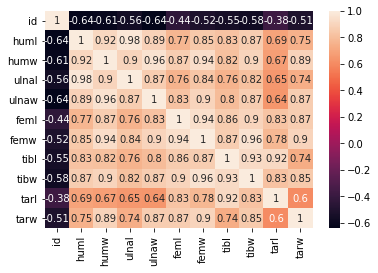

In [22]:
#correlation matrix
correlationmatrix = birddf_clean.corr()
#plotting the correlation matrix
sns.heatmap(birddf_clean.corr(), annot= True)
plt.show()

If we observe the above correlation matrix we can able to see the relation between the all bidrds bone sizes are similer

## scatter plats for all features

In [23]:
unic_birds = birddf_clean.groupby('type').size()
unic_birds

type
P      38
R      48
SO    124
SW    116
T      23
W      64
dtype: int64

# count plot

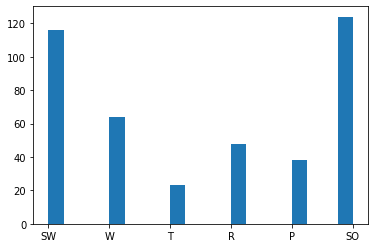

In [24]:
#finding different count for type of birds by useing count plot
plt.hist(birddf_clean['type'],bins=20)
plt.show()

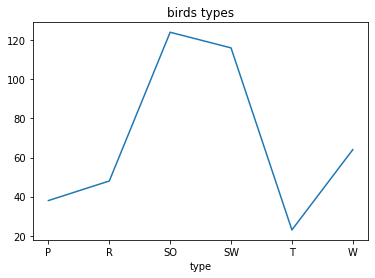

In [273]:
unic_birds.plot(title='birds types')

In [25]:
input_features=['huml','humw','ulnal','ulnaw','feml','femw','tibl','tibw','tarl','tarw']

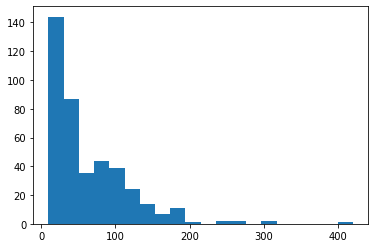

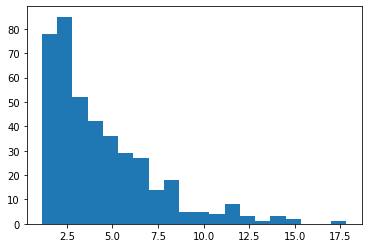

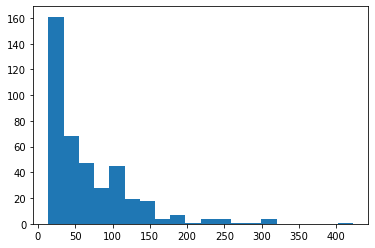

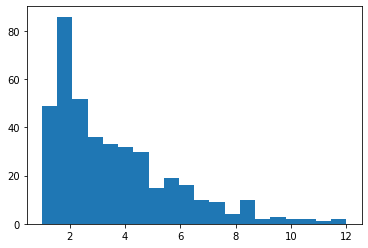

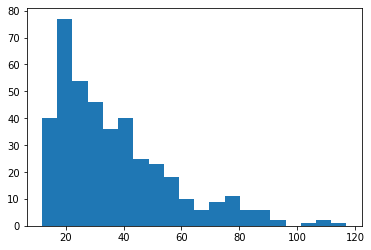

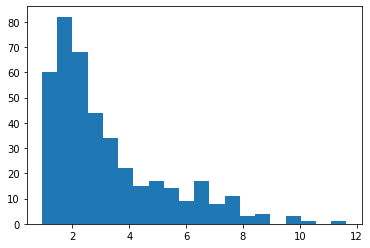

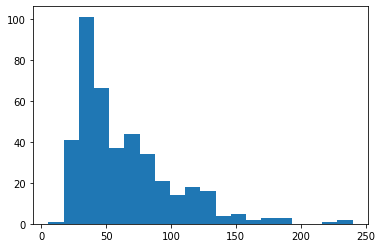

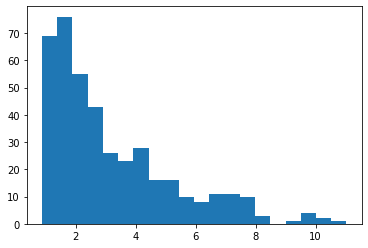

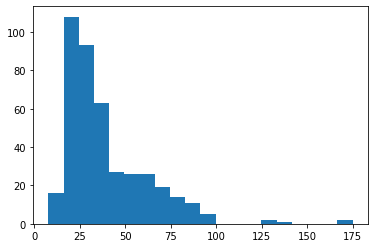

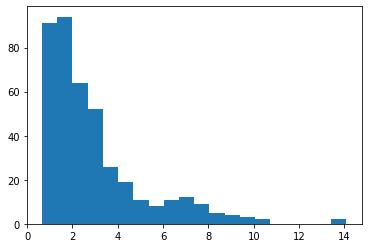

In [295]:
for feature in input_features:
    plt.hist(birddf_clean[feature],bins=20)
    plt.show()

## box plots

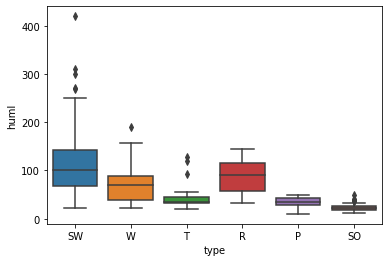

In [284]:
#box-plot 
box1 = sns.boxplot(x='type',y='huml', data=birddf_clean)

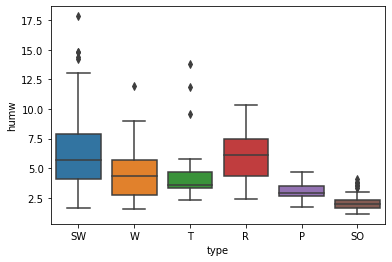

In [285]:
box2 = sns.boxplot(x='type',y='humw', data=birddf_clean)

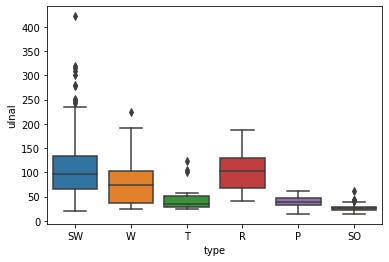

In [286]:
box3 = sns.boxplot(x='type',y='ulnal', data=birddf_clean)

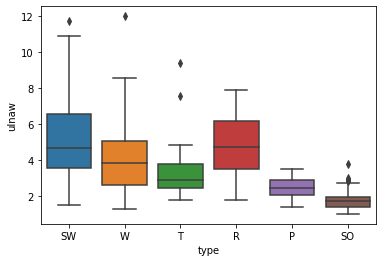

In [287]:
box4 = sns.boxplot(x='type',y='ulnaw', data=birddf_clean)

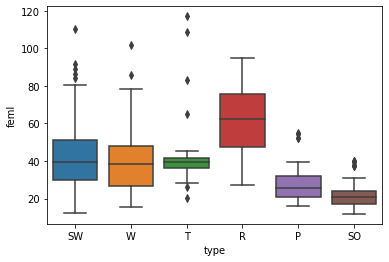

In [288]:
box5 = sns.boxplot(x='type',y='feml', data=birddf_clean)

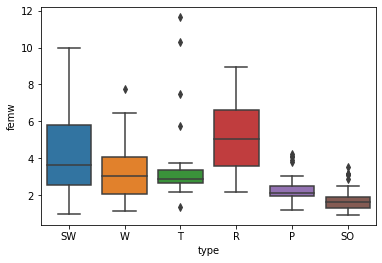

In [289]:
box6 = sns.boxplot(x='type',y='femw', data=birddf_clean)

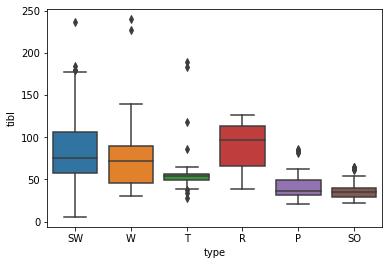

In [291]:
box7 = sns.boxplot(x='type',y='tibl', data=birddf_clean)

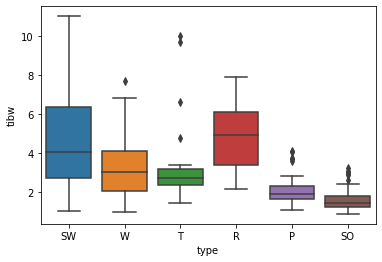

In [292]:
box8 = sns.boxplot(x='type',y='tibw', data=birddf_clean)

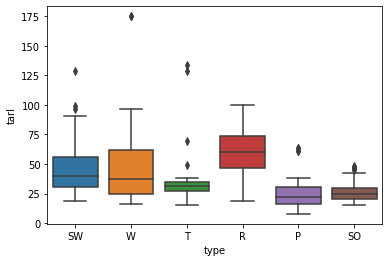

In [293]:
box9 = sns.boxplot(x='type',y='tarl', data=birddf_clean)

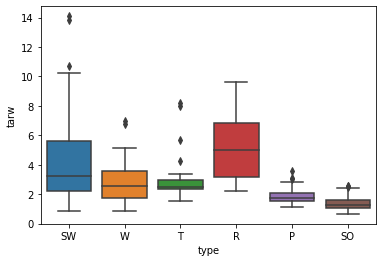

In [294]:
box10 = sns.boxplot(x='type',y='tarw', data=birddf_clean)

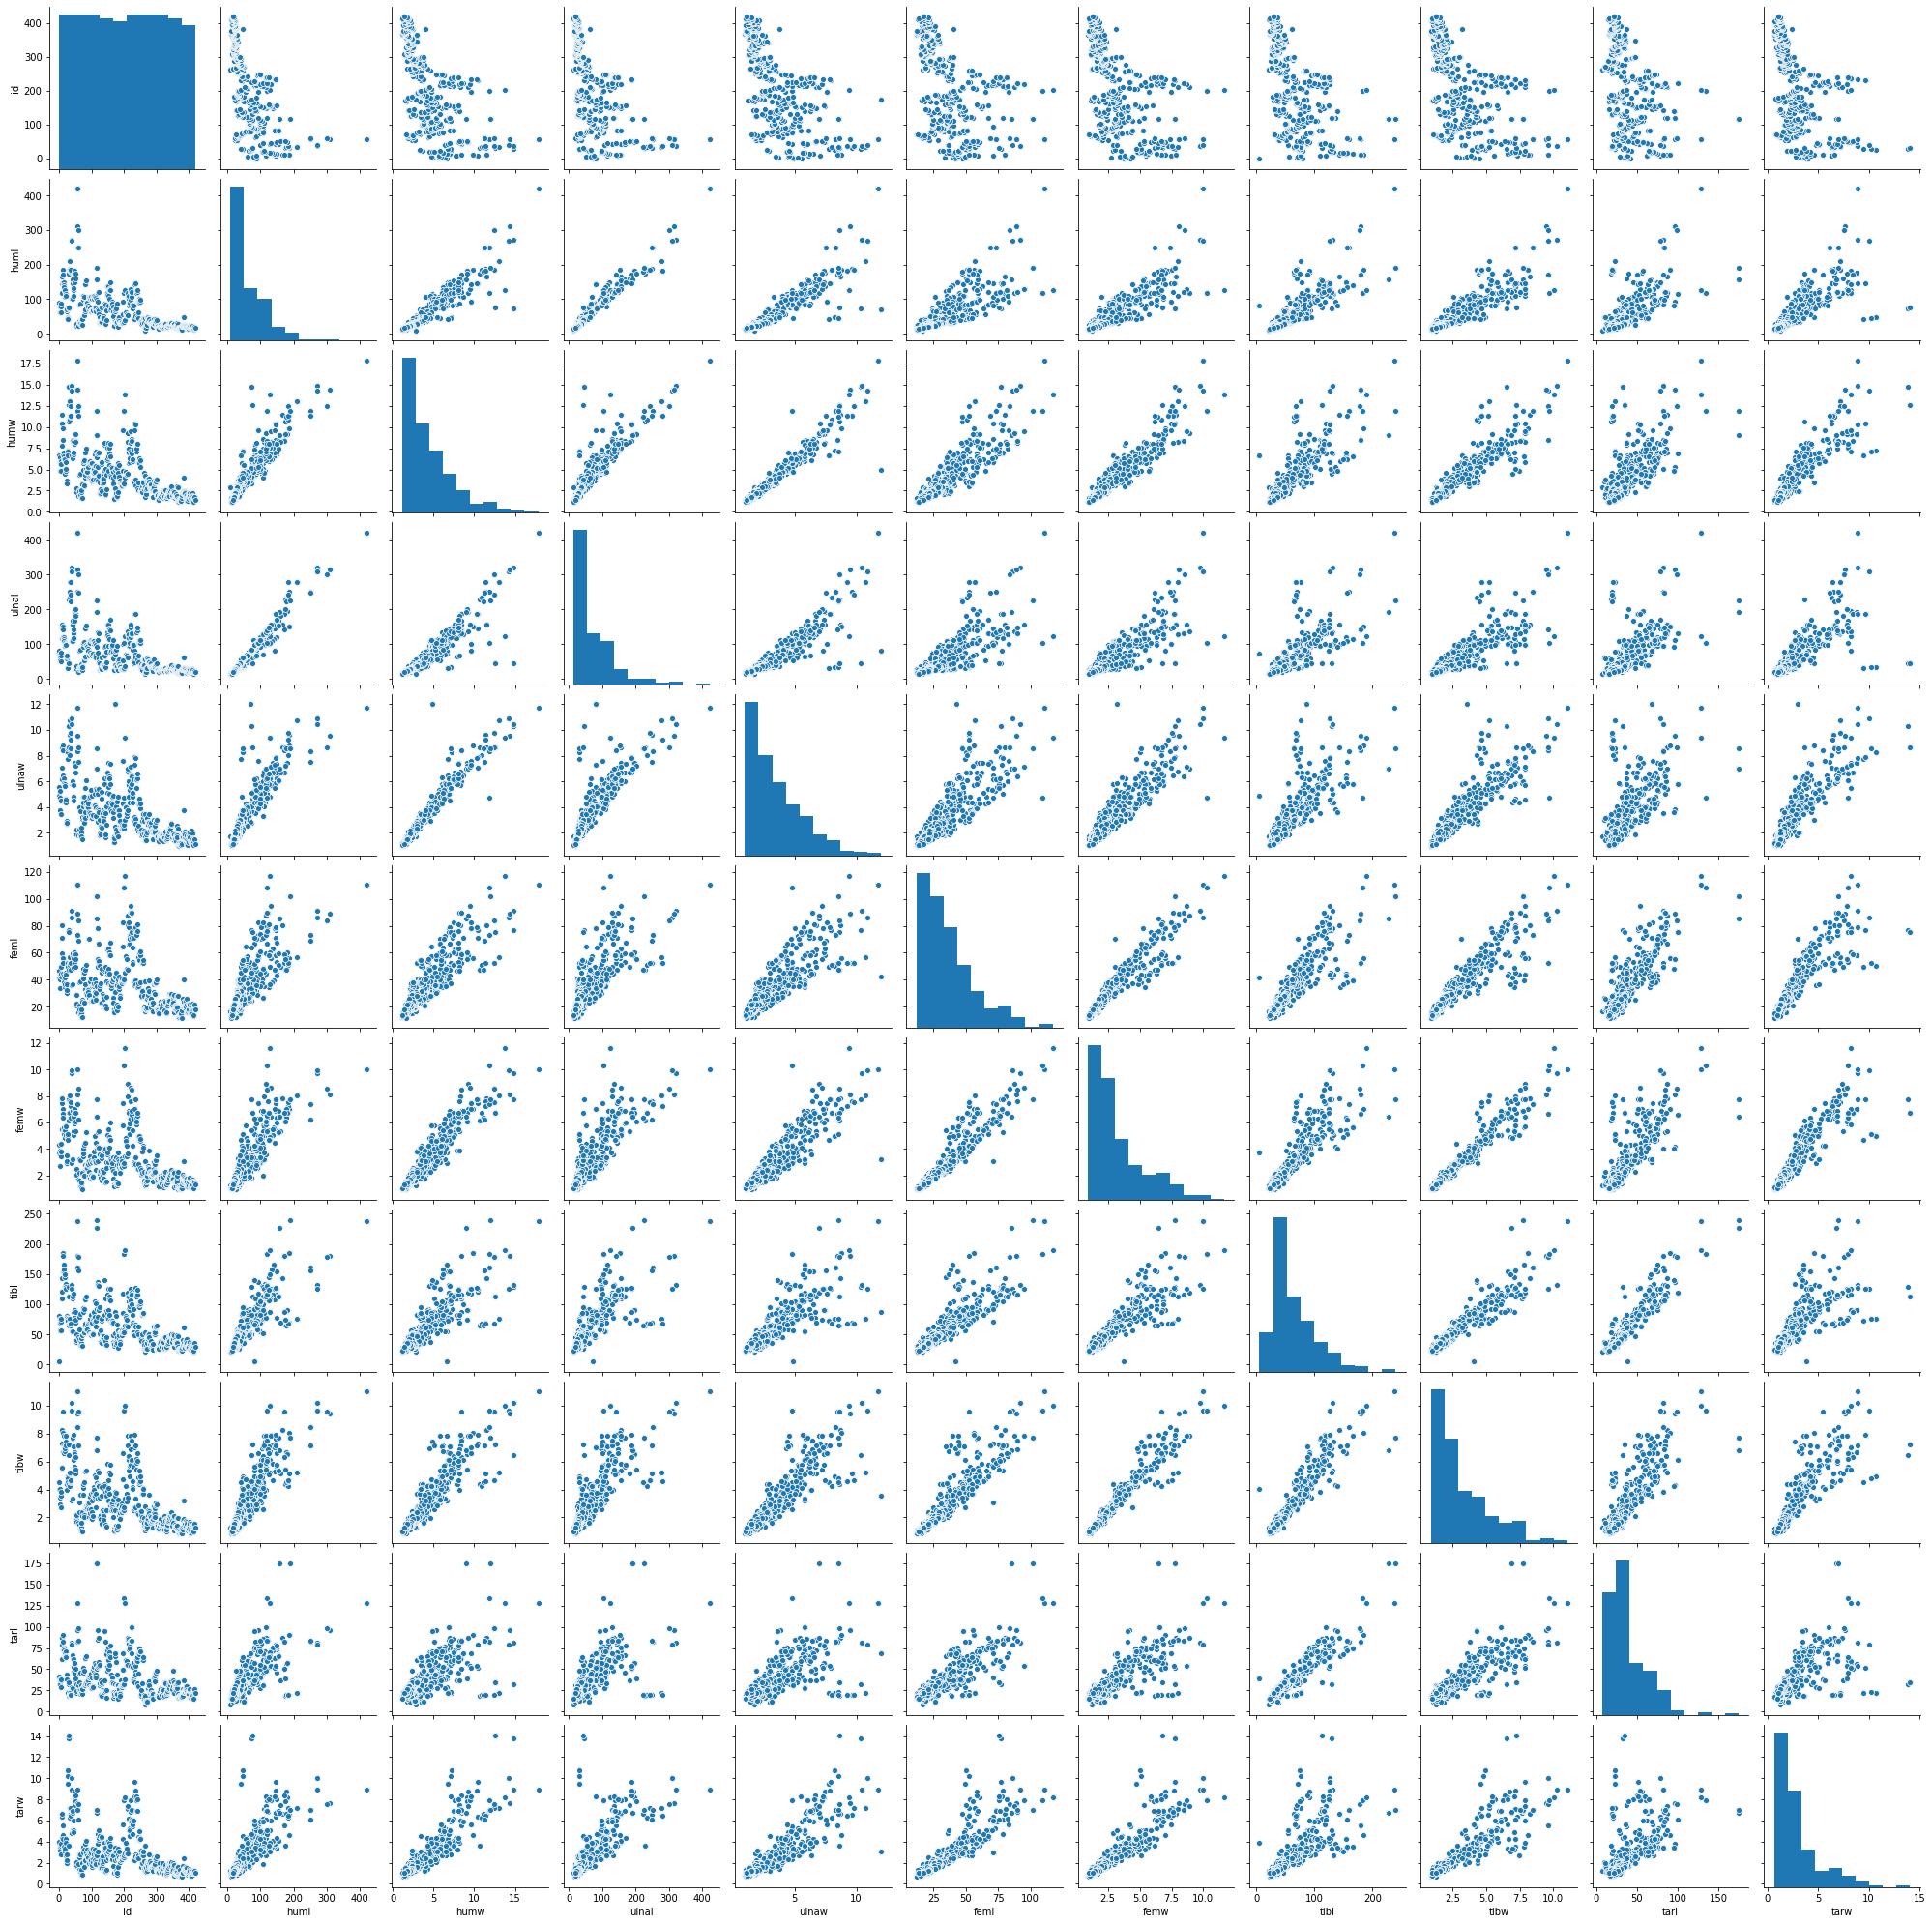

In [279]:
sns.pairplot(birddf_clean)

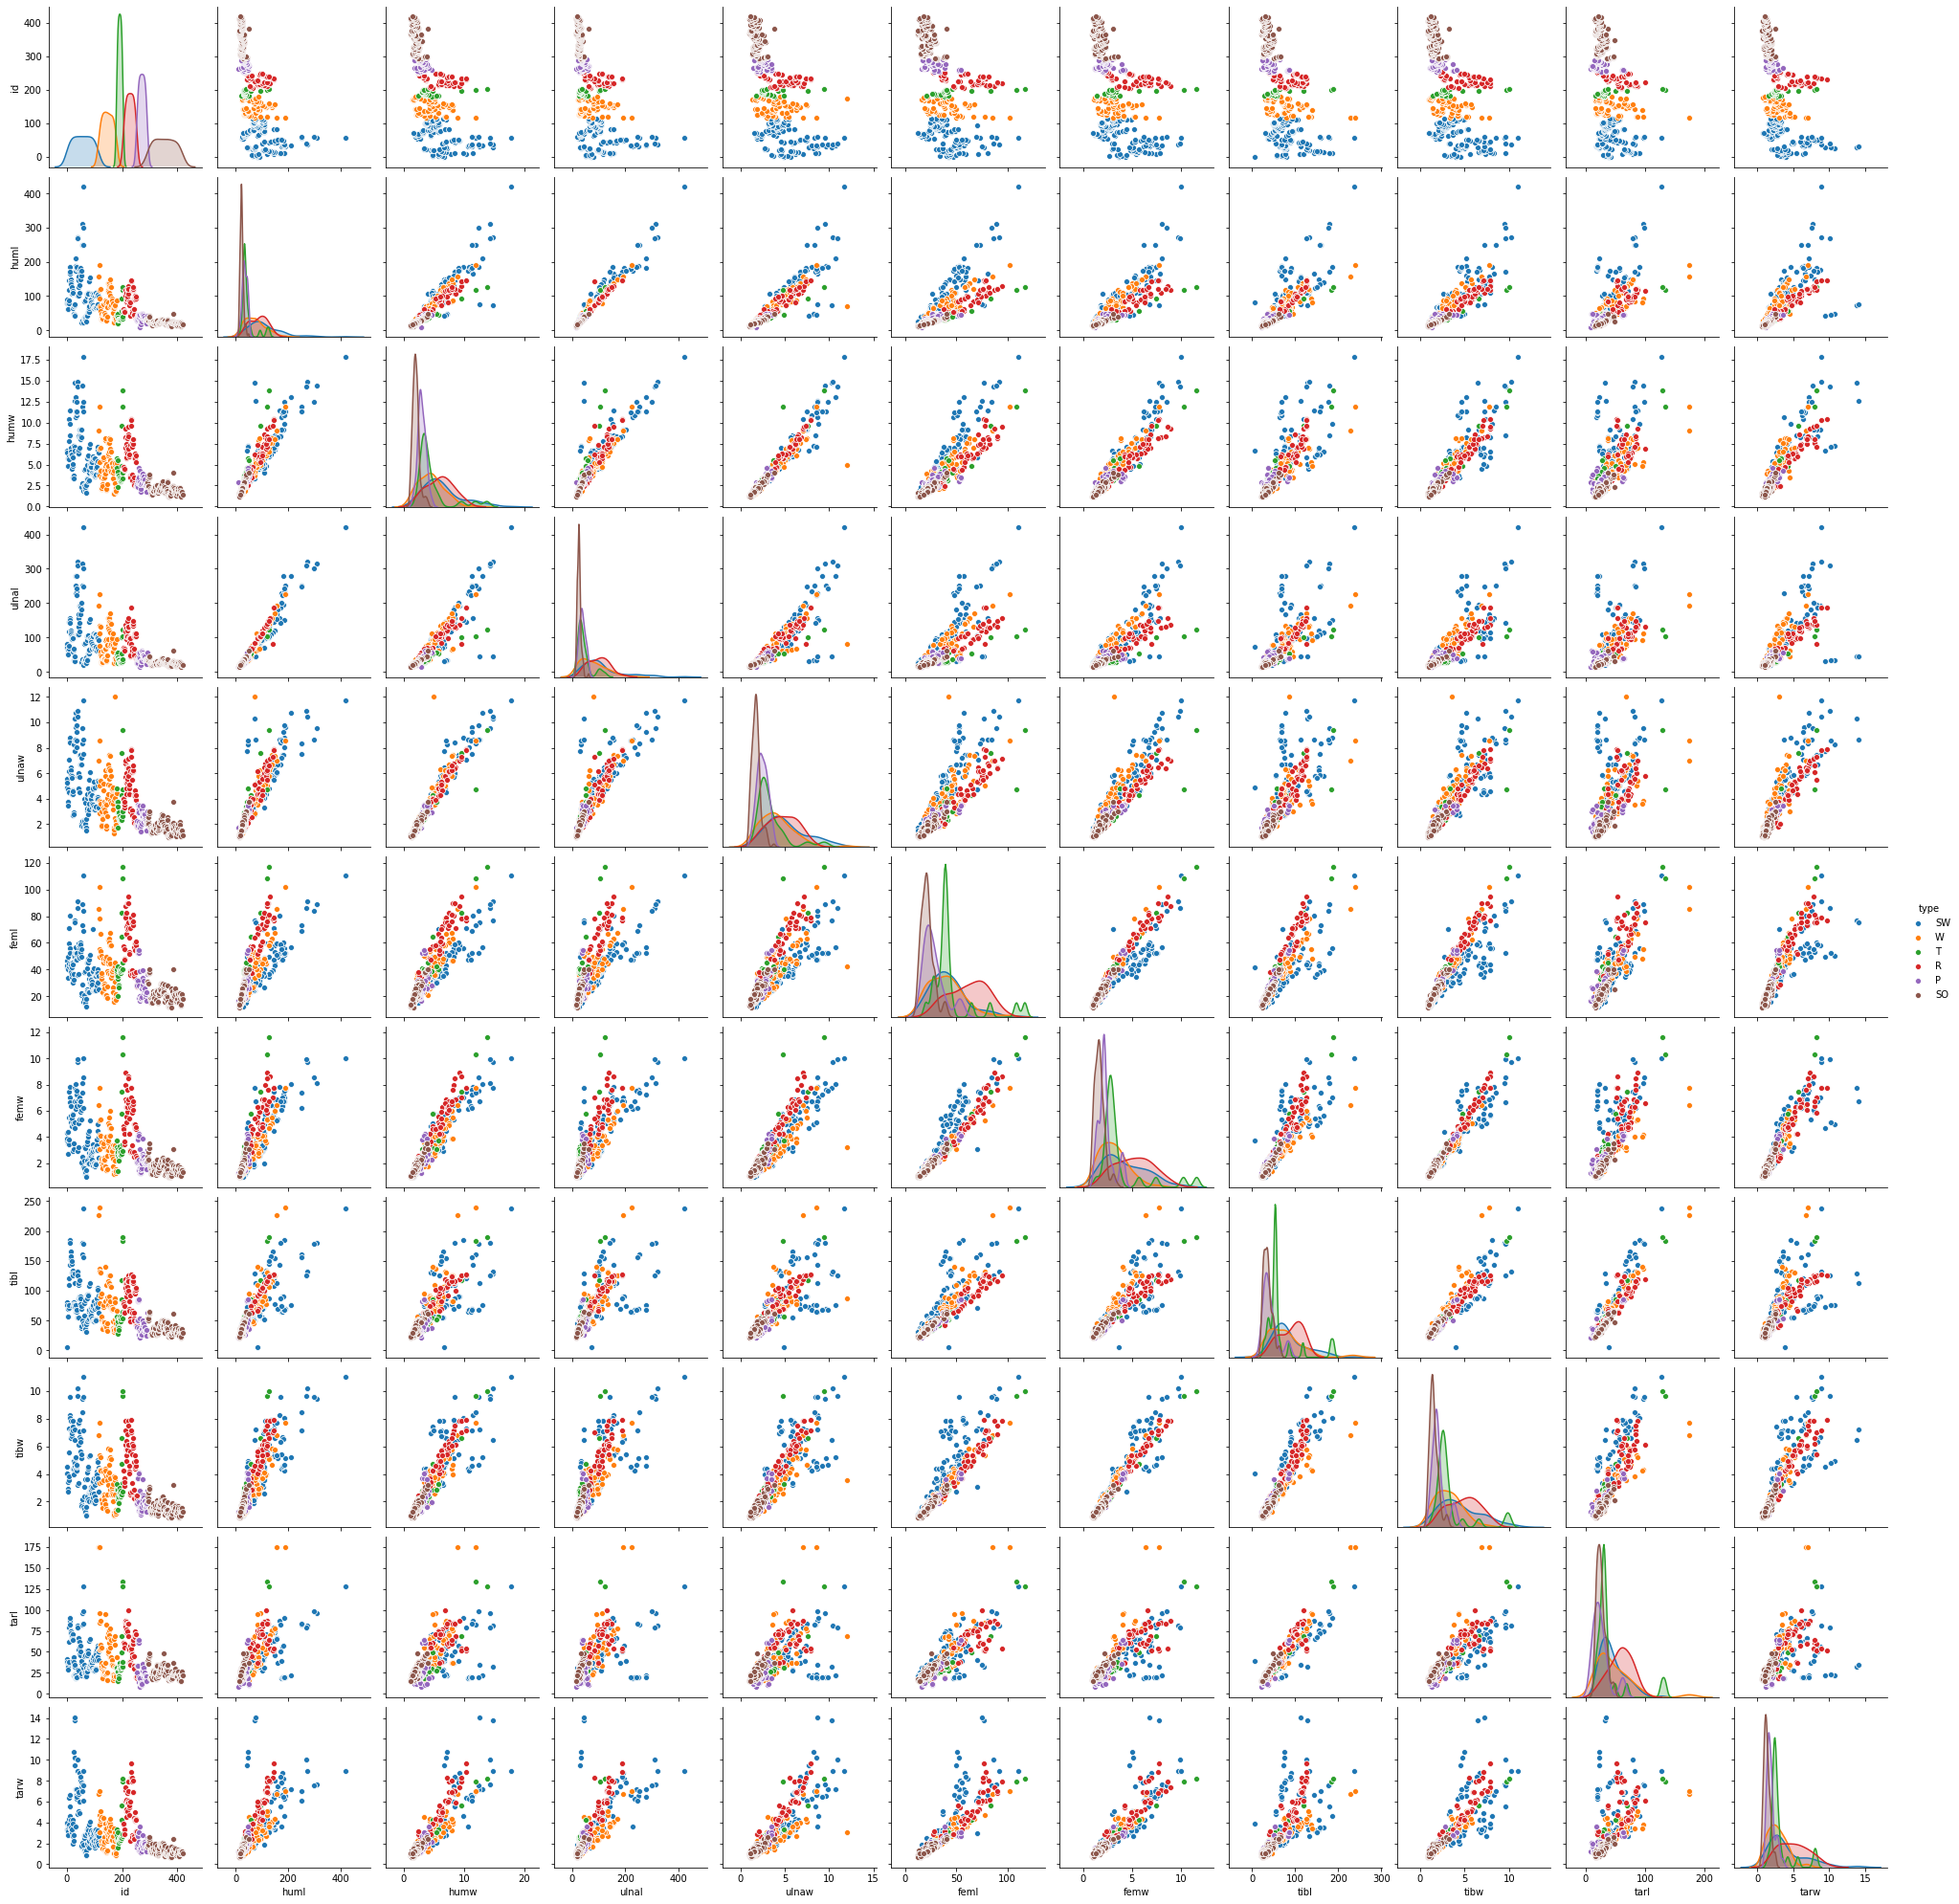

In [27]:
#we can observe the pair plot in a different view
sns.pairplot(birddf_clean,hue='type')

# 2) Machine Learning Task

### A) Importing the required libraries

In [28]:
from sklearn import preprocessing,svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### B) Loading the birdbones.csv file

In [29]:
df=birddf_clean
drop_cols=['id']
df=df.drop(drop_cols,axis=1)

In [30]:
df['type']=df['type'].astype('category')
df['type']=df['type'].cat.codes
df

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3
...,...,...,...,...,...,...,...,...,...,...,...
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,2
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,2
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,2
418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,2


## C)list OF THE COLUM

In [296]:
df.columns

Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')

- id serial numer
- huml Length of humerus
- humw Diameter of humers
- ulnal Length of ulna
- ulnaw diameter of ulna
- feml length of femer
- femw diameter of femur
- tibl length of Tibioyarsus
- tibw diameter of Tibioyasus
- tarl length of Tarsometatarsus
- tarw dimeter of Tarsometatarsus
- type EcologicalBirdType

### D)Constructing a set of features to trin model

In [31]:
for feature in input_features:
    df[feature]=np.log(df[feature])
df

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,4.391729,1.899118,4.276805,1.585145,3.733136,1.308333,1.704748,1.393766,3.655840,1.345472,3
1,4.487625,1.891605,4.388630,1.720979,3.850998,1.458615,4.384773,1.506297,3.725693,1.388791,3
2,4.381652,1.851599,4.237868,1.663926,3.762827,1.360977,4.322144,1.396245,3.645711,1.205971,3
3,4.352212,1.740466,4.186012,1.562346,3.689879,1.258461,4.236567,1.223775,3.577389,1.226712,3
4,4.139955,1.576915,3.952973,1.316408,3.524889,1.000632,4.030162,1.085189,3.461979,1.141033,3
...,...,...,...,...,...,...,...,...,...,...,...
415,2.888147,0.488580,2.957511,0.285179,2.910174,0.431782,3.442019,0.285179,3.090588,0.139762,2
416,2.955431,0.494696,3.033028,0.398776,2.956991,0.371564,3.502851,0.246860,3.161247,0.139762,2
417,2.933325,0.488580,2.987196,0.425268,3.042616,0.357674,3.539509,0.343590,3.129389,0.190620,2
418,3.014554,0.576613,3.114848,0.405465,3.061052,0.392042,3.586016,0.425268,3.257327,0.215111,2


### E)seting independent variable

In [297]:
independent_variable=df.type
independent_variable

0      3
1      3
2      3
3      3
4      3
      ..
415    2
416    2
417    2
418    2
419    2
Name: type, Length: 413, dtype: int8

In [298]:
scaler=preprocessing.StandardScaler()
X=df.drop(['type'],axis=1)
y=np.array(df['type'])
scaler.fit(X)

StandardScaler()

In [299]:
X=scaler.transform(X)
X

array([[ 0.67522169,  1.01052846,  0.44297069, ...,  0.69759941,
         0.24288609,  0.7534491 ],
       [ 0.80166994,  0.99802436,  0.59646783, ...,  0.88049548,
         0.37813465,  0.82047259],
       [ 0.66193296,  0.93144396,  0.38952289, ...,  0.70162742,
         0.22327537,  0.5376106 ],
       ...,
       [-1.24784303, -1.33701301, -1.327221  , ..., -1.0092508 ,
        -0.77640995, -1.03335195],
       [-1.1407335 , -1.19050016, -1.15199877, ..., -0.87649964,
        -0.52870015, -0.99545915],
       [-1.31256419, -1.54327971, -1.36725529, ..., -1.21806638,
        -0.87813091, -1.25279336]])

### F)train and test split 

In [301]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [302]:
X_train , X_test ,y_train ,y_test

(array([[ 1.49131626,  1.32100822,  1.62207457, ...,  1.27810894,
          1.61003538,  0.93926182],
        [ 0.66242753,  0.42543888,  1.04877482, ...,  0.34797928,
         -0.02554104,  0.20848912],
        [ 1.16785638,  1.55226348,  1.32101326, ...,  1.78952308,
          1.80261376,  1.76004609],
        ...,
        [-0.50043922, -0.69311874, -0.36920693, ..., -0.32357304,
         -1.12433947,  0.31370686],
        [ 1.0635092 ,  0.97527747,  1.1552467 , ...,  0.72161904,
          1.11786754,  0.39707853],
        [-1.38529164, -1.45329628, -1.35096033, ..., -1.44260187,
         -0.90328793, -1.45729113]]),
 array([[ 4.35855222e-01,  2.92814832e-01,  5.61422289e-01,
          4.93107275e-01, -3.15314695e-01, -1.19196608e-01,
         -3.65317102e-01, -5.90533867e-02, -5.59499160e-01,
         -7.36010070e-02],
        [-1.39545589e+00, -1.38886418e+00, -1.33138057e+00,
         -1.36623303e+00, -1.28353799e+00, -1.28428174e+00,
         -1.16305523e+00, -1.29867620e+00, -8.

### G) Train the model using support vector machine 

In [300]:
#### Checking the accuracy score in support vector Classifier
clf=svm.SVC()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print(acc)
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)
print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

0.7590361445783133
cost of training model
 [[18  3  3  0  2  0]
 [ 3 32  0  4  3  0]
 [ 0  2 94  1  0  0]
 [ 0  0  5 83  1  4]
 [ 2  2  1  0 14  0]
 [ 5  3  9 22  1 13]]
cost of training model
               precision    recall  f1-score   support

           0       0.64      0.69      0.67        26
           1       0.76      0.76      0.76        42
           2       0.84      0.97      0.90        97
           3       0.75      0.89      0.82        93
           4       0.67      0.74      0.70        19
           5       0.76      0.25      0.37        53

    accuracy                           0.77       330
   macro avg       0.74      0.72      0.70       330
weighted avg       0.77      0.77      0.74       330

cost of testing model
 [[ 7  2  3  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  0 27  0  0  0]
 [ 0  0  2 18  0  3]
 [ 0  1  0  0  3  0]
 [ 1  2  2  3  0  3]]
cost of training model
               precision    recall  f1-score   support

           0       0.64      0.69 

In [303]:
### Checking the accuracy score in RandomForest Classifier
clf=RandomForestClassifier(random_state=3)
clf.fit(X_train,y_train,)
acc=clf.score(X_test,y_test)
print(acc)
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)
print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

0.8554216867469879
cost of training model
 [[26  0  0  0  0  0]
 [ 0 42  0  0  0  0]
 [ 0  0 97  0  0  0]
 [ 0  0  0 93  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 53]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        53

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

cost of testing model
 [[11  1  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 27  0  0  0]
 [ 0  0  2 17  0  4]
 [ 0  1  0  0  3  0]
 [ 1  0  0  3  0  7]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00 

### Finding best model and hyper parameter tunning using GridSearchCV

In [245]:
kernel = ['linear','rbf','poly','sigmoid']
for i in kernel:
    clf=svm.SVC(kernel=i,C=1.0)
    clf.fit(X_train,y_train)
    print('for kernel:',i)
    print('Accuracy is :',clf.score(X_test,y_test))

for kernel: linear
Accuracy is : 0.8433734939759037
for kernel: rbf
Accuracy is : 0.7590361445783133
for kernel: poly
Accuracy is : 0.6867469879518072
for kernel: sigmoid
Accuracy is : 0.4819277108433735


in svc the linear model is giving high accuracy of 84.3%

In [304]:
### in svc the accuracy for train and test
clf=svm.SVC()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print('test Accuracy is :',acc)
print('train Accuracy is :',clf.score(X_train,y_train))

test Accuracy is : 0.7590361445783133
train Accuracy is : 0.7696969696969697


In [305]:
clf=RandomForestClassifier(random_state=3)
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print('test Accuracy is :',acc)
print('train Accuracy is :',clf.score(X_train,y_train))

test Accuracy is : 0.8554216867469879
train Accuracy is : 1.0


as we check the above value in the train accuracy it was 100% and test is 85.5% the difference bitween train and test is high and hard to fit in model so we need to process test and train values in RandomForestClassifier

## build randon forest model with hyperparameters

In [306]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [307]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [308]:
rf_Model = RandomForestClassifier()

In [309]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [310]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [311]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [312]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.800
Test Accuracy - : 0.759


as we check the above value in the train accuracy it was 80% and test is 75.9% the difference bitween train and test is low and it is easy to fit in model

In [314]:
###finally we take the RFC and we run the model for best accuracy
clf=RandomForestClassifier(random_state=3)
clf.fit(X_train,y_train,)
acc=clf.score(X_test,y_test)
print(acc)
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)
print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

0.8554216867469879
cost of training model
 [[26  0  0  0  0  0]
 [ 0 42  0  0  0  0]
 [ 0  0 97  0  0  0]
 [ 0  0  0 93  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0 53]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        53

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

cost of testing model
 [[11  1  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 27  0  0  0]
 [ 0  0  2 17  0  4]
 [ 0  1  0  0  3  0]
 [ 1  0  0  3  0  7]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00 